In [88]:
import tensorflow
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

import numpy as np
import os
from IPython.display import Image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Input, DepthwiseConv2D
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense , Dropout ,MaxPooling2D ,Add
from tensorflow.keras import Model
from tensorflow.keras import regularizers

from tensorflow.keras.utils import plot_model

In [ ]:
!pip install h5py==2.10.0

     |████████████████████████████████| 2.9 MB 7.5 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Post-hurricane.zip'


In [ ]:
img = image.load_img('/content/train_another/damage/-93.55964_30.895018.jpeg')
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

(1, 128, 128, 3)


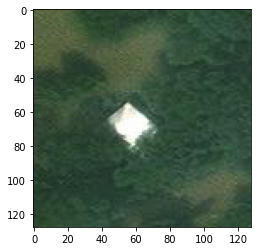

In [ ]:
# Displaying an example img
plt.imshow(img_tensor[0])
plt.show()

In [ ]:
from tqdm import tqdm
import os
import pandas as pd

### Custom model 1 : Mobilenet inspired 

In [ ]:
# your code here

# Constructing CNN model 

def block (x, filters, strides):

    l2=regularizers.l2(0.1)
    x = DepthwiseConv2D(kernel_size = 3, strides = strides, padding = 'same')(x)
    x = ReLU()(x)
  
    x = Conv2D(filters = filters, kernel_size = 3, strides = 1,kernel_regularizer=l2)(x)
    x = ReLU()(x)
  
    x = MaxPooling2D(pool_size=(2, 2) ,strides = 1)(x)

    return x


def cnn_model(n_filters1=32,n_filters2 = 64 ,n_filters3 = 128,n_filters4 = 512):

    input = Input(shape = (224,224,3))
    x = Conv2D(filters = n_filters2 , kernel_size = 3, strides = 1, padding = 'same')(input)
    x = ReLU()(x)

    # main part of the model
    
    x = block(x, filters = n_filters2, strides = 1)
    x = BatchNormalization()(x)
    x = block(x, filters = n_filters3, strides = 2)
    #x = BatchNormalization()(x)
    x = block(x, filters = n_filters4, strides = 2)

    x= Flatten()(x)
    x = Dense(128 , activation = 'relu')(x)
    output = Dense(1, activation = 'sigmoid')(x)

    model = Model(inputs=input, outputs=output)
    #print(model.summary())
    
    return model

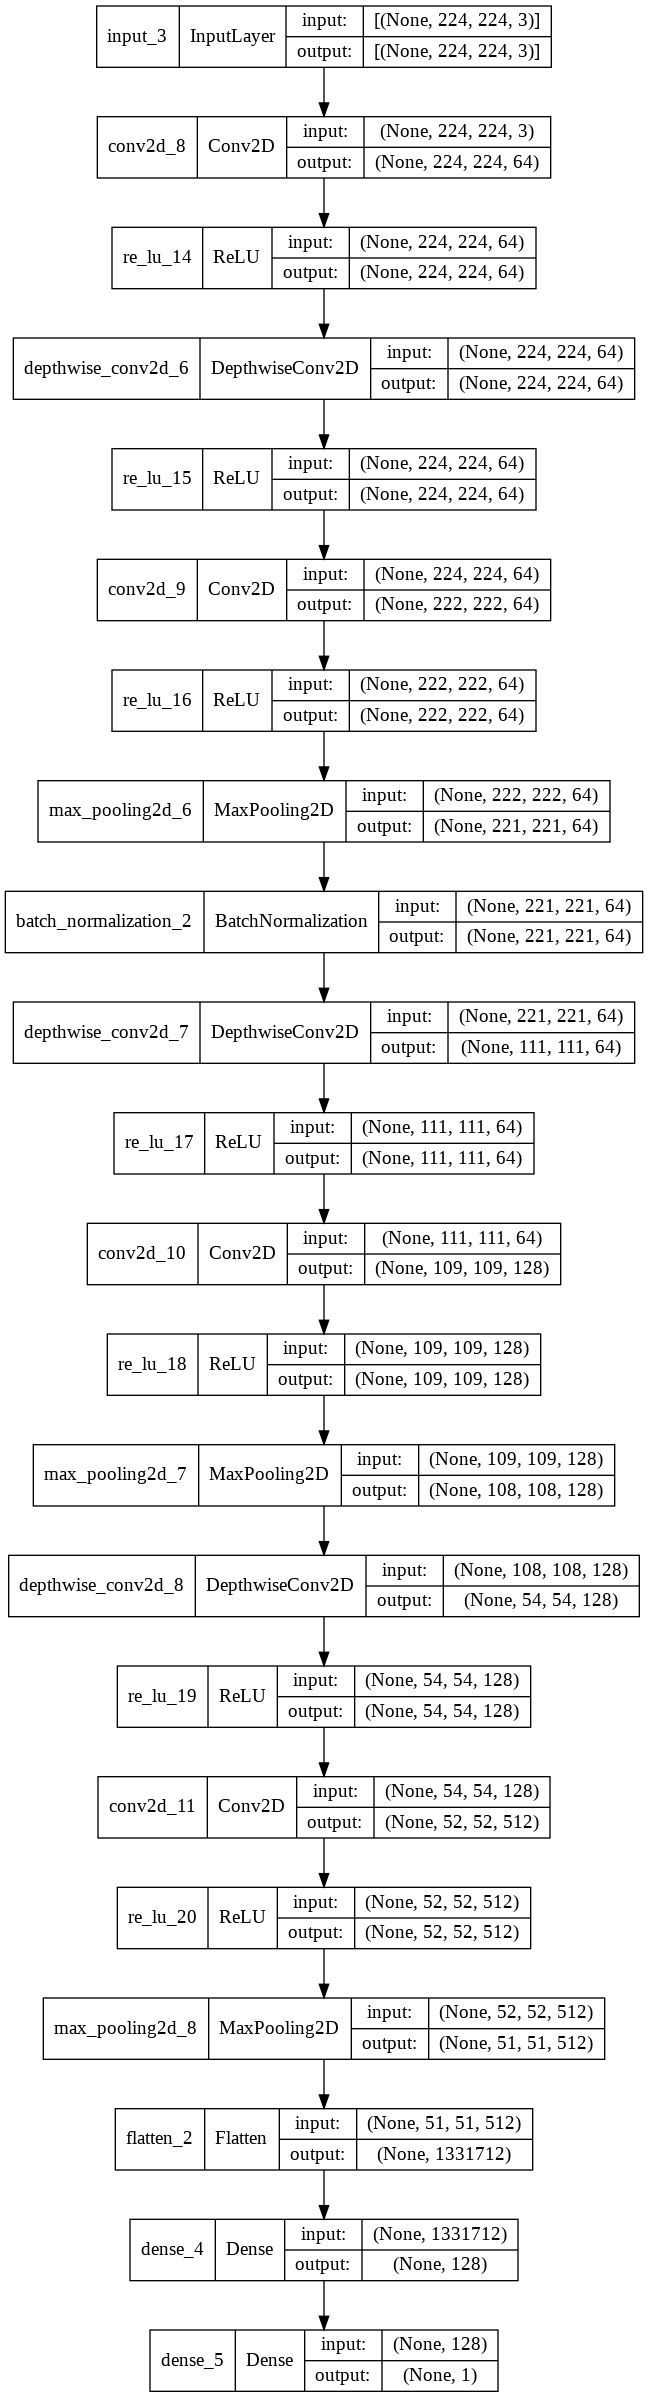

In [ ]:
plot_model(model1, show_shapes=True, show_layer_names=True)

In [ ]:
datagen = ImageDataGenerator(rescale=1./255,horizontal_flip=True, vertical_flip=True ,rotation_range=60)

In [ ]:
train_generator = datagen.flow_from_directory(
        '/content/train_another',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',shuffle = True)
validation_generator = datagen.flow_from_directory(
        '/content/validation_another',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary' , shuffle = True)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
model1 = cnn_model()
model1.compile(optimizer=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
device_name = tensorflow.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  print('GPU device not found')
  
  history1 = model1.fit(train_generator, batch_size = 32 , epochs = 5 , validation_data =validation_generator  ,use_multiprocessing = True,callbacks = [model_checkpoint_callback])
else:
  with tensorflow.device('/device:GPU:0'):
    
    history1 = model1.fit(train_generator, batch_size = 32 , epochs = 5 , validation_data = validation_generator ,use_multiprocessing = True,callbacks = [model_checkpoint_callback])



In [ ]:
h1 = model1.load_weights('/content/drive/MyDrive/Ai/EFF1101.h5')

In [ ]:
datagen_t = ImageDataGenerator(rescale=1./255)
test_another = datagen_t.flow_from_directory(
        '/content/test_another',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',shuffle = True)
test_ = datagen_t.flow_from_directory(
        '/content/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',shuffle = True)

Found 9000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
t_a = model1.evaluate(test_another)

282/282 [==============================] - 74s 262ms/step - loss: 0.3358 - accuracy: 0.9416


In [ ]:
t = model1.evaluate(test_)

63/63 [==============================] - 17s 261ms/step - loss: 0.3581 - accuracy: 0.9190


In [ ]:
from prettytable import PrettyTable
  

Table = PrettyTable(["Model",  "Val_ACC", "Train_ACC",'Test_ACC','Test_Another_ACC'])
Table._max_width = {"Model" : 30, "Val_ACC":10, "Train_ACC":10, "Test_ACC":10,'Test_Another_ACC':10}  

Table.add_row(["CNN_Custom_Mobilenet","0.9330","0.9091",round(t[1],4), round(t_a[1],4)])


print(Table)

+----------------------+---------+-----------+----------+------------------+
|        Model         | Val_ACC | Train_ACC | Test_ACC | Test_Another_ACC |
+----------------------+---------+-----------+----------+------------------+
| CNN_Custom_Mobilenet |  0.9330 |   0.9091  |  0.919   |      0.9416      |
+----------------------+---------+-----------+----------+------------------+


### Custom Model 2 : Mobilenet fatures + Skip connections


### A )   

#### The to come up with this model , Model 1 gave good accuracy but it saturated around 94 , it stopped learning possible reasons may be fanishing gradients.

#### So in this model , we include resnet features by adding multiple skip connections 

In [ ]:
# your code here

# Constructing CNN model 

def block (y, filters, strides ,use_1x1conv = False  ):

    l2=regularizers.l2(0.1)
    y = DepthwiseConv2D(kernel_size = 3, strides = 1)(y)
    x = ReLU()(y)
  
    x = Conv2D(filters = filters, kernel_size = 3, strides = 1,kernel_regularizer=l2,padding = 'same')(x)
    x = ReLU()(x)
  
    

    if use_1x1conv:
      # Add a 1x1 convolution layer with given num_channels and strides
      y = Conv2D(filters,kernel_size =1,strides = 1 )(x)
    # Add A and X for skip connection using Add layer from keras
    x = Add()([x,y]) # Skip connection
    x = MaxPooling2D(pool_size=(2, 2) ,strides = strides )(x)
    return x


def cnn_model2(n_filters1=32,n_filters2 = 64 ,n_filters3 = 128,n_filters4 = 256):

    input = Input(shape = (128,128,3))
    x = Conv2D(filters = n_filters1 , kernel_size = 3, strides = 1, padding = 'same')(input)
    x = ReLU()(x)
    x = Conv2D(filters = n_filters1 , kernel_size = 3, strides = 1, padding = 'same')(x)
    x = ReLU()(x)
    x = MaxPooling2D(pool_size=(2, 2) ,strides = 1 )(x)
    # main part of the model
    
    x = block(x, filters = n_filters2, strides = 1,use_1x1conv = True)
    x = block(x, filters = n_filters2, strides = 2)
    x = BatchNormalization()(x)
    x = block(x, filters = n_filters3, strides = 1,use_1x1conv = True)
    x = block(x, filters = n_filters3, strides = 2)
    #x = BatchNormalization()(x)
    #x = block(x, filters = n_filters4, strides = 1,use_1x1conv = True)
    #x = block(x, filters = n_filters4, strides = 1)

    x= Flatten()(x)
    l2=regularizers.l2(0.1)
    x = Dense(1024 , activation = 'relu',kernel_regularizer=l2)(x)
    x = Dropout(0.2)(x)
    x = Dense(128 , activation = 'relu')(x)
    output = Dense(1, activation = 'sigmoid')(x)

    model = Model(inputs=input, outputs=output)
    #print(model.summary())
    
    return model

In [ ]:
model2 = cnn_model2()
#model2.summary()

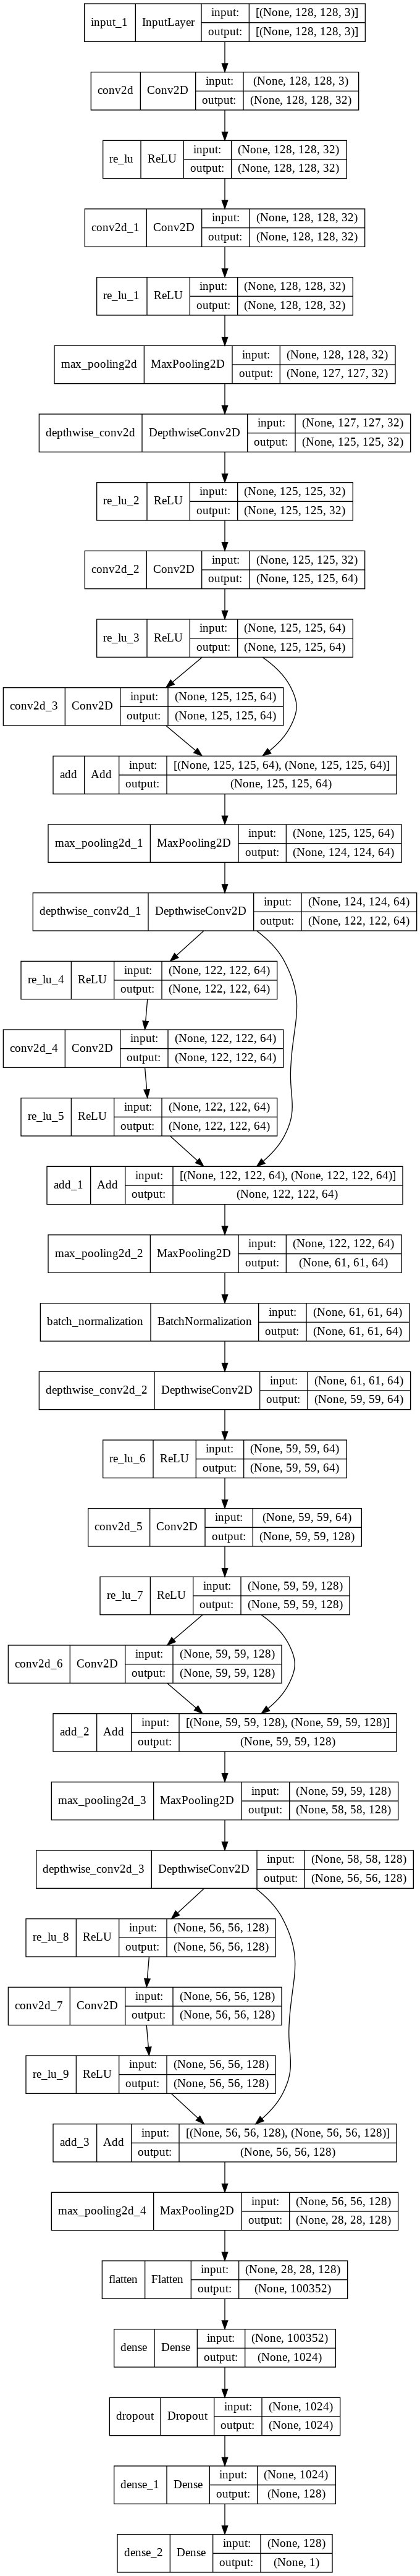

In [ ]:
plot_model(model2, show_shapes=True, show_layer_names=True)

In [ ]:
model2.compile(optimizer=keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/weights/model27{epoch:02d}.h5'
model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
model2.load_weights('/content/drive/MyDrive/weights_/model2702.h5')

Text(0.5, 1.0, 'Accuracy Curves')

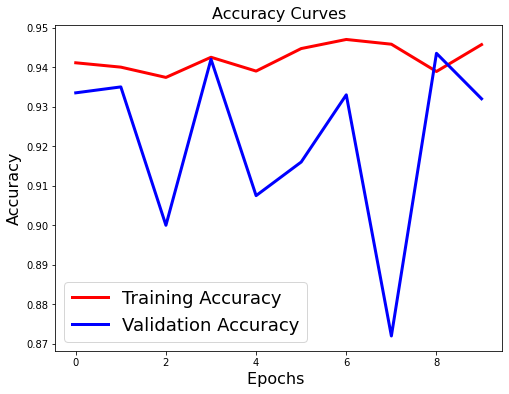

In [ ]:

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(train_acc,'r',linewidth=3.0)
plt.plot(val_acc,'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
print('No.of layers',len(model2.layers))

No.of layers 38


In [ ]:
t_a2 = model2.evaluate(test_another)

282/282 [==============================] - 54s 190ms/step - loss: 0.1251 - accuracy: 0.9722


In [ ]:
t2 = model2.evaluate(test_)

63/63 [==============================] - 12s 187ms/step - loss: 0.1971 - accuracy: 0.9320


In [ ]:
from prettytable import PrettyTable
  

Table = PrettyTable(["Model",  "Val_ACC", "Train_ACC",'Test_ACC','Test_Another_ACC'])
Table._max_width = {"Model" : 30, "Val_ACC":10, "Train_ACC":10, "Test_ACC":10,'Test_Another_ACC':10}  

Table.add_row(["CNN_Custom_Mobilenet_Residual","0.9440","0.9446",round(t2[1],4), round(t_a2[1],4)])

print(Table)

+-------------------------------+---------+-----------+----------+------------------+
|             Model             | Val_ACC | Train_ACC | Test_ACC | Test_Another_ACC |
+-------------------------------+---------+-----------+----------+------------------+
| CNN_Custom_Mobilenet_Residual |  0.9440 |   0.9446  |  0.932   |      0.9722      |
+-------------------------------+---------+-----------+----------+------------------+


### B) 
#### Here we can our model didnt saturate soon , and its biased as test biased has higher accuracy 

#### So now we tune our model in terms of learning rate and trained the model for the longer time 

In [ ]:
t_2 = model2.evaluate(test_another)

282/282 [==============================] - 35s 124ms/step - loss: 0.1113 - accuracy: 0.9704


In [ ]:
t_1 = model2.evaluate(test_)

63/63 [==============================] - 8s 124ms/step - loss: 0.1355 - accuracy: 0.9575


In [ ]:
from prettytable import PrettyTable
  

Table = PrettyTable(["Model",  "Val_ACC", "Train_ACC",'Test_ACC','Test_Another_ACC'])
Table._max_width = {"Model" : 30, "Val_ACC":10, "Train_ACC":10, "Test_ACC":10,'Test_Another_ACC':10}  

Table.add_row(["Custom2_tuned","0.9596","0.9580","0.9575", "0.9704"])

print(Table)

+---------------+---------+-----------+----------+------------------+
|     Model     | Val_ACC | Train_ACC | Test_ACC | Test_Another_ACC |
+---------------+---------+-----------+----------+------------------+
| Custom2_tuned |  0.9596 |   0.9580  |  0.9575  |      0.9704      |
+---------------+---------+-----------+----------+------------------+


In [109]:
!pip3 -qq install tf_keras_vis 

     |████████████████████████████████| 53 kB 1.7 MB/s 


In [119]:
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from matplotlib import cm
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam

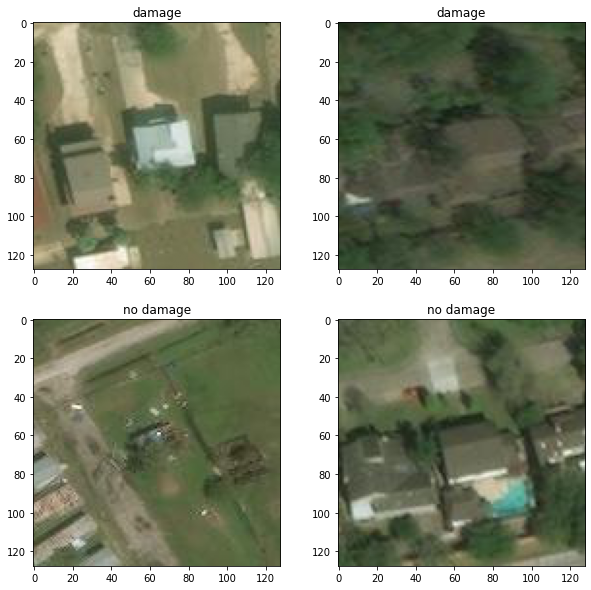

In [141]:
# ploting train data 
import os


display=[]
for i in ['damage','no_damage']:
    for j in os.listdir(os.path.join('/content/train_another',i))[:3]:
      images=[]

      image=tf.keras.utils.img_to_array(tf.keras.utils.load_img(os.path.join('/content/train_another',i,j))).astype('float')*1/255

      display.append(image)

fig,ax=plt.subplots(2,2,figsize=(10,10))

for i,actual_imgs in enumerate([display[:2],display[2:4]]):
  for j , img in enumerate(actual_imgs):
      ax[i,j].imshow(img)
      if i==0:
        ax[i,j].set_title("damage")
      else:
        ax[i,j].set_title("no damage")
plt.show()

#### Saliency map and GeadCam for Damaged image 

In [144]:
replace2linear = ReplaceToLinear()
categ = 0
score = CategoricalScore([0])

In [145]:
saliency = Saliency(model2,
                    model_modifier=replace2linear,
                    clone=True)


# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(score,
                        np.expand_dims(display[0], axis=0),
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.

## Since v0.6.0, calling `normalize()` is NOT necessary.
#saliency_map = normalize(saliency_map)

# Create Gradcam object
gradcam = Gradcam(model2,
                  model_modifier=replace2linear,
                  clone=True)

# Generate heatmap with GradCAM
cam = gradcam(score,
              np.expand_dims(display[0], axis=0),
              penultimate_layer=-1)
#cam = normalize(cam)

In [146]:

la =model2.predict(np.expand_dims(display[0], axis=0))
labl = np.where(la<0.5 , 0 , 1)
labl

array([[0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


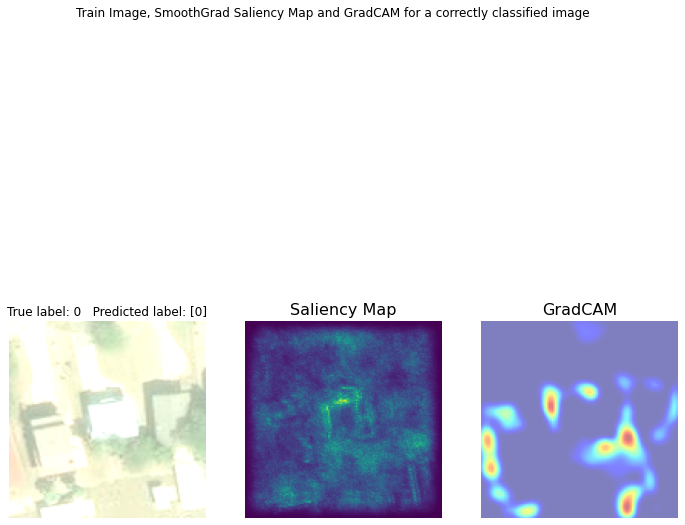

In [147]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))
ax[0].imshow(display[0].squeeze() + 0.5)
ax[0].set_title('True label: '+ '0' + '   Predicted label: ' + str(labl[0]))
ax[0].axis('off')

ax[1].set_title('Saliency Map', fontsize=16)
ax[1].imshow(saliency_map[0].squeeze() , cmap='viridis')
ax[1].axis('off')

ax[2].set_title('GradCAM', fontsize=16)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
ax[2].imshow(heatmap , cmap='jet', alpha=0.5)
ax[2].axis('off')

fig.suptitle('Train Image, SmoothGrad Saliency Map and GradCAM for a correctly classified image')
#plt.tight_layout()
plt.show()

#### Salience map and GradCam for Non damage image

In [148]:
score = CategoricalScore([0])

saliency = Saliency(model2,
                    model_modifier=replace2linear,
                    clone=True)


# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(score,
                        np.expand_dims(display[2], axis=0),
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.

## Since v0.6.0, calling `normalize()` is NOT necessary.
#saliency_map = normalize(saliency_map)

# Create Gradcam object
gradcam = Gradcam(model2,
                  model_modifier=replace2linear,
                  clone=True)

# Generate heatmap with GradCAM
cam = gradcam(score,
              np.expand_dims(display[2], axis=0),
              penultimate_layer=-1)
#cam = normalize(cam)

In [149]:
la2 =model2.predict(np.expand_dims(display[2], axis=0))
lab2 = np.where(la2<0.5 , 0 , 1)
lab2

array([[1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


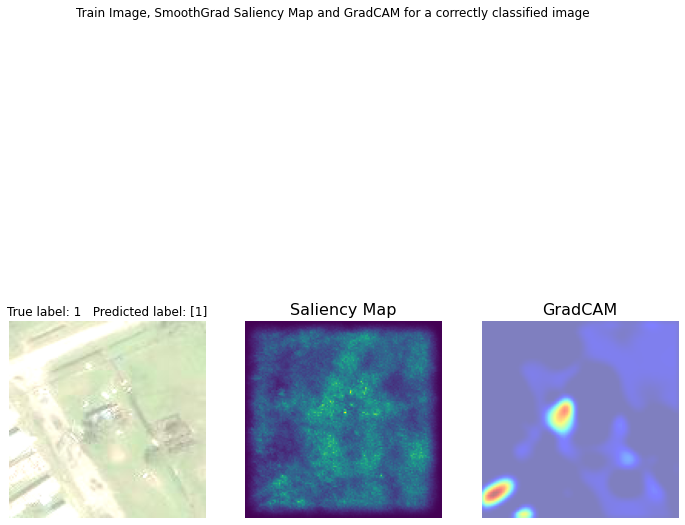

In [150]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 12))
ax[0].imshow(display[2].squeeze() + 0.5)
ax[0].set_title('True label: '+ '1' + '   Predicted label: ' + str(lab2[0]))
ax[0].axis('off')

ax[1].set_title('Saliency Map', fontsize=16)
ax[1].imshow(saliency_map[0].squeeze() , cmap='viridis')
ax[1].axis('off')

ax[2].set_title('GradCAM', fontsize=16)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)
ax[2].imshow(heatmap , cmap='jet', alpha=0.5)
ax[2].axis('off')

fig.suptitle('Train Image, SmoothGrad Saliency Map and GradCAM for a correctly classified image')
#plt.tight_layout()
plt.show()

#### We can observe the model is capturing the features , pretty good !

#### Plotting feature maps 

In [156]:
layers_list = model2.layers
print('\n'.join([str([i , layers_list[i].name]) for i in range(len(layers_list))]))

[0, 'input_1']
[1, 'conv2d']
[2, 're_lu']
[3, 'conv2d_1']
[4, 're_lu_1']
[5, 'max_pooling2d']
[6, 'depthwise_conv2d']
[7, 're_lu_2']
[8, 'conv2d_2']
[9, 're_lu_3']
[10, 'conv2d_3']
[11, 'add']
[12, 'max_pooling2d_1']
[13, 'depthwise_conv2d_1']
[14, 're_lu_4']
[15, 'conv2d_4']
[16, 're_lu_5']
[17, 'add_1']
[18, 'max_pooling2d_2']
[19, 'batch_normalization']
[20, 'depthwise_conv2d_2']
[21, 're_lu_6']
[22, 'conv2d_5']
[23, 're_lu_7']
[24, 'conv2d_6']
[25, 'add_2']
[26, 'max_pooling2d_3']
[27, 'depthwise_conv2d_3']
[28, 're_lu_8']
[29, 'conv2d_7']
[30, 're_lu_9']
[31, 'add_3']
[32, 'max_pooling2d_4']
[33, 'flatten']
[34, 'dense']
[35, 'dropout']
[36, 'dense_1']
[37, 'dense_2']


In [157]:
def plot_featuremaps(img,activations,layer_names):
    fig, axs = plt.subplots(ncols=4, nrows=4,figsize = (6,6))
    gs = axs[1, 2].get_gridspec()
    # remove the underlying axes
    for ax in axs[1:-1, 1:-1]:
        ax[0].remove()
        ax[1].remove()
    axbig = fig.add_subplot(gs[1:-1, 1:-1])

    axbig.imshow(img.squeeze() + 0.5)
#     axbig.set_title(f'{cifar10dict[np.argmax(model.predict(img))]}')
    axbig.axis('off')

    for i, axis in enumerate(axs.ravel()):
        axis.imshow(activations.squeeze()[:,:,i], cmap='gray')
        axis.axis('off')

    fig.tight_layout()
    fig.suptitle(f'Feature maps for {layer_names[0]}',size=16,y=1.05);

Layer Name conv2d/BiasAdd:0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer Name conv2d_1/BiasAdd:0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer Name conv2d_2/BiasAdd:0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer Name conv2d_3/BiasAdd:0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer Name conv2d_4/BiasAdd:0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer Name conv2d_5/BiasAdd:0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer Name conv2d_6/BiasAdd:0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Layer Name conv2d_7/BiasAdd:0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


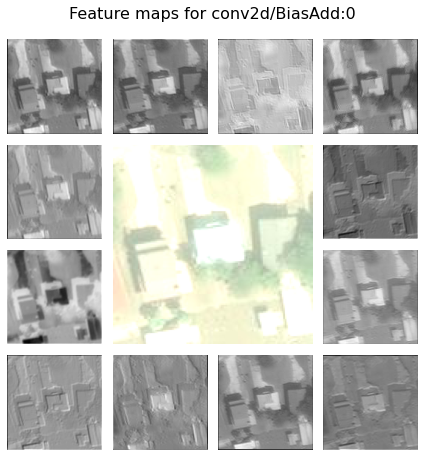

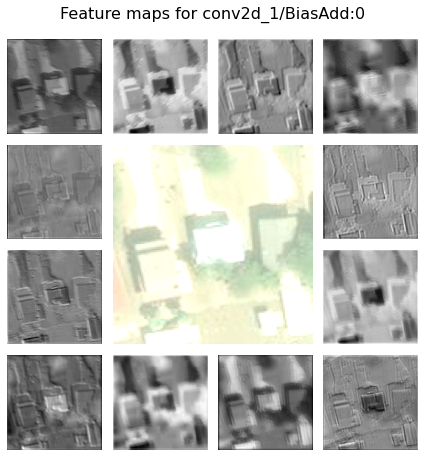

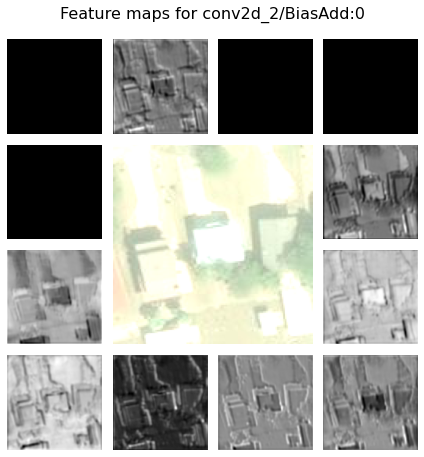

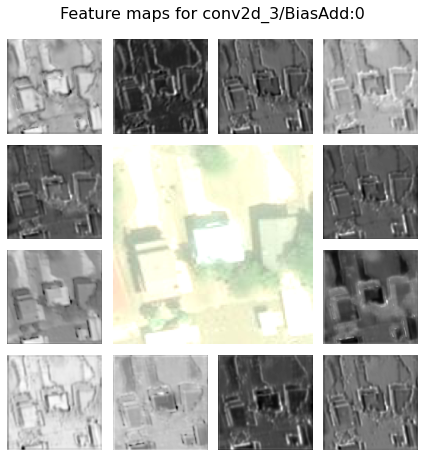

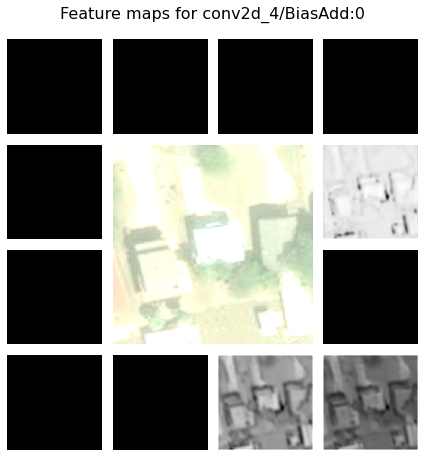

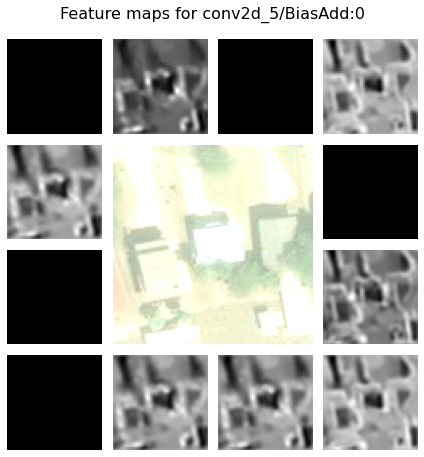

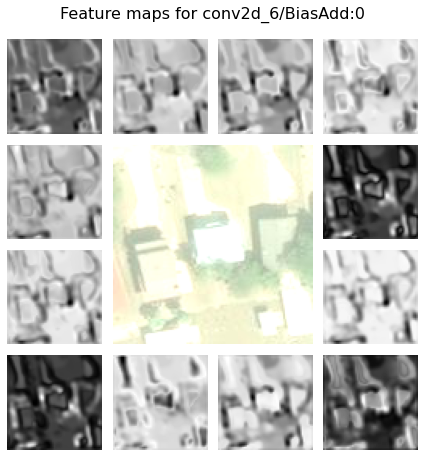

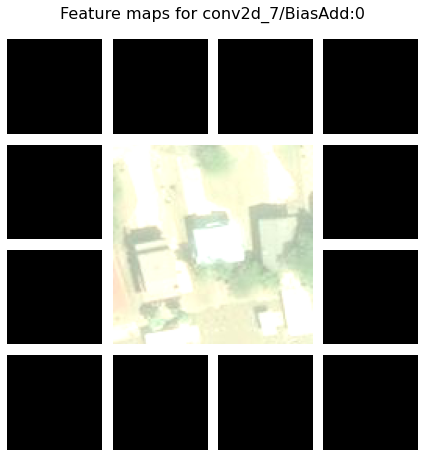

In [158]:
conv_l =[1,3,8,10,15,22,24,29]
for i in conv_l:
  layer_output = model2.layers[i].output
  print('Layer Name',layer_output.name)
  feature_model = Model(inputs = model2.input  , outputs = layer_output)

  # Use a sample image from the test set to visualize the feature maps
  img = np.expand_dims(display[0], axis=0)

  feature_map = feature_model.predict(img)
  plot_featuremaps(img,feature_map,[layer_output.name])

#### Observation 🇰

1) The black feature map shows the vanishing gradient 

2) 5th conv layer has 3/4th of it and 8th conv hasnt learnt anything , the reason is the ship connection . they are redundant . 

3) Skip connections have help recover vanishing gradient problem and avoid overfitting 

### Custom Model 3 

#### Here We extract the features of the tuned custom model2  and combine that with geo coordinates 

here's the link to the paper https://arxiv.org/pdf/2012.08624.pdf

Which increases the accuracy by 2 to 3 %

In [ ]:
model2.layers[36].name

'dense_1'

In [ ]:
#creating enocoded train data
import re
def encode_data(path):
  
  class_labels=[]
  encoded_imgs=[]
  paths=[]
  for i in os.listdir(path):
    if i =='damage' :
      for j in tqdm(os.listdir(os.path.join(path,i))):
        
        k=re.sub("[jpge]","",j).strip(".").split("_")
        paths.append([os.path.join(path,i,j),0,np.round(float(k[0]),6),np.round(float(k[1]),6)])
  
  train_sub1_dataframe=pd.DataFrame(np.array(paths),columns=['id','labels','lat','lon'])

  paths=[]
  for i in os.listdir(path):
    print(i)
    if i=='no_damage':
      for j in tqdm(os.listdir(os.path.join(path,i))):
        k=re.sub("[jpge]","",j).strip(".").split("_")
        paths.append([os.path.join(path,i,j),1,np.round(float(k[0]),6),np.round(float(k[1]),6)])


  train_sub2_dataframe=pd.DataFrame(np.array(paths),columns=['id','labels','lat','lon'])

 
  return pd.concat([train_sub1_dataframe , train_sub2_dataframe] , axis =0)


In [ ]:

def train_fea_df(train_df):
  shuffled_data= train_df.sample(frac = 1)

  datagen_df = ImageDataGenerator(rescale=1./255,rotation_range=40,
      height_shift_range=0.2,
      width_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

  train_generator=datagen_df.flow_from_dataframe(
  shuffled_data, directory=None, x_col='id', y_col='labels',
  weight_col=None, target_size=(128, 128), color_mode='rgb',
    class_mode='binary', batch_size=50, shuffle=False,
  seed=None, save_to_dir=None, interpolation='nearest')

  layer_output = model2.layers[36].output
  dense = Model(inputs = model2.input  , outputs = layer_output)
  activations = dense.predict(train_generator)

  features = pd.DataFrame(activations)

  out = shuffled_data['labels']
  inp = shuffled_data.drop(['labels','id'] , axis = 1)

  features['lati'] = inp['lat'].values
  features['lon'] = inp['lon'].values

  return features

In [ ]:
def train_fea_df(test_df):
  shuffled_data= test_df.sample(frac = 1)

  datagen_df = ImageDataGenerator(rescale=1./255)

  train_generator=datagen_df.flow_from_dataframe(
  shuffled_data, directory=None, x_col='id', y_col='labels',
  weight_col=None, target_size=(128, 128), color_mode='rgb',
    class_mode='binary', batch_size=50, shuffle=False,
  seed=None, save_to_dir=None, interpolation='nearest')

  layer_output = model2.layers[36].output
  dense = Model(inputs = model2.input  , outputs = layer_output)
  activations = dense.predict(train_generator)

  features = pd.DataFrame(activations)

  out = shuffled_data['labels']
  inp = shuffled_data.drop(['labels','id'] , axis = 1)

  features['lati'] = inp['lat'].values
  features['lon'] = inp['lon'].values

  return features , out

In [ ]:
train_df = encode_data("/content/train_another")
train_f , tr_y = train_fea_df(train_df)

val_df = encode_data("/content/validation_another")


100%|██████████| 5000/5000 [00:00<00:00, 32756.59it/s]


.DS_Store
no_damage


100%|██████████| 5000/5000 [00:00<00:00, 29369.41it/s]

damage


Found 10000 validated image filenames belonging to 2 classes.


100%|██████████| 1000/1000 [00:00<00:00, 25691.89it/s]


no_damage


100%|██████████| 1000/1000 [00:00<00:00, 32389.70it/s]


damage
Found 2000 validated image filenames belonging to 2 classes.


In [ ]:
val_f , v_y = train_fea_df(val_df)

Found 2000 validated image filenames belonging to 2 classes.


In [ ]:
test_df = encode_data("/content/test")
test_f , te_y= train_fea_df(test_df)

test_a_df = encode_data("/content/test_another")
test_a_f , te_a_y = train_fea_df(test_a_df)

100%|██████████| 1000/1000 [00:00<00:00, 26248.03it/s]


.DS_Store
no_damage


100%|██████████| 1000/1000 [00:00<00:00, 28432.88it/s]


damage
Found 2000 validated image filenames belonging to 2 classes.


100%|██████████| 8000/8000 [00:00<00:00, 33469.55it/s]


no_damage


100%|██████████| 1000/1000 [00:00<00:00, 31051.21it/s]


damage
Found 9000 validated image filenames belonging to 2 classes.


In [91]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import f1_score

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_f, tr_y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [92]:
valid_pred = lr.predict(val_f)
v = v_y.to_numpy()
v = np.where(v == '0' , 0, 1)
pred = np.where(valid_pred>0.5 , 1 , 0)
f1_val = f1_score(v, pred, average='micro')
tpr, fpr, _ = roc_curve(v, pred)
auc = roc_auc_score(v[:], pred[:])
acc = accuracy_score(v[:], pred[:]>0.5)

print(auc , acc)

0.9644999999999998 0.9645


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [93]:
test_pred = lr.predict(test_f)
te = te_y.to_numpy()
te = np.where(te == '0' , 0, 1)
pred1 = np.where(test_pred>0.5 , 1 , 0)

f1_test = f1_score(te, pred1, average='micro')
tpr_t1, fpr_t1, _ = roc_curve(te, pred1)
auc1 = roc_auc_score(te[:], pred1[:])
acc1 = accuracy_score(te[:], pred1[:]>0.5)

print(auc1 , acc1)

0.9679999999999999 0.968


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [151]:
test_a_pred = lr.predict(test_a_f)
te = te_a_y.to_numpy()
te = np.where(te == '0' , 0, 1)
pred2 = np.where(test_a_pred>0.5 , 1 , 0)

f1_t_a = f1_score(te, pred2, average='micro')
tpr_t2, fpr_t2, _ = roc_curve(te, pred2)
auc2 = roc_auc_score(te[:], pred2[:])
acc2 = accuracy_score(te[:], pred2[:]>0.5)

print(auc2 , acc2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.9606875 0.9674444444444444


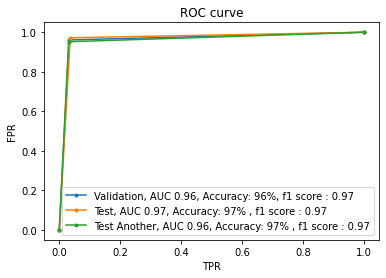

In [155]:


plt.plot(tpr, fpr, '.-', label='{}, AUC {:0.2f}, Accuracy: {:2.0%}, f1 score : {}'.format("Validation", auc, acc,round(f1_val,2)))
plt.plot(tpr_t1, fpr_t1, '.-', label='{}, AUC {:0.2f}, Accuracy: {:2.0%} , f1 score : {}'.format("Test", auc1, acc1 , round(f1_test,2)))
plt.plot(tpr_t2, fpr_t2, '.-', label='{}, AUC {:0.2f}, Accuracy: {:2.0%} , f1 score : {}'.format("Test Another", auc2, acc2 , round(f1_t_a,2)))
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.title("ROC curve")
plt.legend()
plt.show()


In [160]:
Table = PrettyTable(["Model",  "Val_ACC", "Train_ACC",'Test_ACC','Test_Another_ACC'])
Table._max_width = {"Model" : 400, "Val_ACC":10, "Train_ACC":10, "Test_ACC":10,'Test_Another_ACC':10}  

Table.add_row(["Custom_mobilenet","0.9330","0.9091","0.919", "0.946"])
Table.add_row(["Custom_mobilenet_residual","0.9440","0.9446","0.932", "0.9722"])
Table.add_row(["Custom_mobilenet_residual_tuned","0.9596","0.9580","0.9575", "0.9704"])
Table.add_row(["Custom_mobilenet_residual_tuned_LR",round(acc,2),"0.9610",acc1,round(acc2,2)])

print(Table)

+------------------------------------+---------+-----------+----------+------------------+
|               Model                | Val_ACC | Train_ACC | Test_ACC | Test_Another_ACC |
+------------------------------------+---------+-----------+----------+------------------+
|          Custom_mobilenet          |  0.9330 |   0.9091  |  0.919   |      0.946       |
|     Custom_mobilenet_residual      |  0.9440 |   0.9446  |  0.932   |      0.9722      |
|  Custom_mobilenet_residual_tuned   |  0.9596 |   0.9580  |  0.9575  |      0.9704      |
| Custom_mobilenet_residual_tuned_LR |   0.96  |   0.9610  |  0.968   |       0.97       |
+------------------------------------+---------+-----------+----------+------------------+


Observations ⁉

1) Addition of geo coordinates has increased the accuracy 

2)The model is good and not overfitting 

3)Tuning this model in terms of architecture and hyperparameters or trainig it for longer can give good accuracy 

4)Furture feature engineering which can add an advantage!